**Assignment 1**

**Neural Network**

**Noorah Alkhaniny**

Directions In this assignment, you will accomplish the following:

1.Modify an existing neural network model to improve performance

2.Explain how different approaches affect the performance of the model For the IMDB example that we discussed in class, do the following:

1.You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

3.Try using the mse loss function instead ofbinary_crossentropy.

4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

**Adding libraries**

In [58]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers

**Importing the dataset**

In [59]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [60]:
train_labels[0]

1

In [61]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [62]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [63]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [64]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [65]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

**Model Structure**

In [66]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [67]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [68]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [69]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5608 - accuracy: 0.7459 - val_loss: 0.4160 - val_accuracy: 0.8539
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3141 - accuracy: 0.8955 - val_loss: 0.3018 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2114 - accuracy: 0.9296 - val_loss: 0.2759 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1569 - accuracy: 0.9517 - val_loss: 0.2765 - val_accuracy: 0.8918
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1202 - accuracy: 0.9661 - val_loss: 0.2902 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0923 - accuracy: 0.9762 - val_loss: 0.3119 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0720 - accuracy: 0.9838 - val_loss: 0.3403 - val_accuracy: 0.8786
Epoch 8/20
30

**Plotting the training and validation loss**

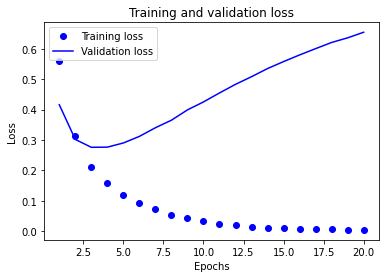

In [70]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

*1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.*

In [71]:
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [72]:
model1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [73]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history1_1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5839 - accuracy: 0.7591 - val_loss: 0.4292 - val_accuracy: 0.8601
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3094 - accuracy: 0.8981 - val_loss: 0.2965 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1936 - accuracy: 0.9329 - val_loss: 0.2795 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1366 - accuracy: 0.9577 - val_loss: 0.2906 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0995 - accuracy: 0.9733 - val_loss: 0.3189 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0713 - accuracy: 0.9831 - val_loss: 0.3576 - val_accuracy: 0.8777
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0503 - accuracy: 0.9897 - val_loss: 0.3994 - val_accuracy: 0.8756
Epoch 8/20
30

**Ploting:**

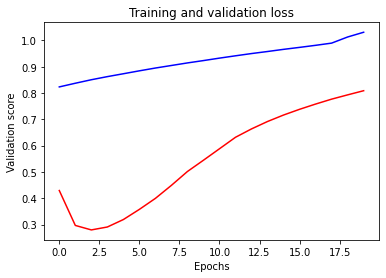

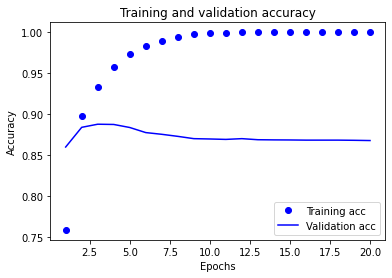

In [74]:
historyp1 = history1.history
historyp1_1 = history1_1.history

plt.plot(history1.history['val_loss'], 'r', history1_1.history['val_loss'], 'b')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

plt.clf()
acc = historyp1["accuracy"]
val_acc = historyp1["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

*2.Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.*


In [75]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [76]:
model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [78]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5227 - accuracy: 0.7832 - val_loss: 0.3396 - val_accuracy: 0.8706
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2371 - accuracy: 0.9151 - val_loss: 0.2760 - val_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1423 - accuracy: 0.9521 - val_loss: 0.2990 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0924 - accuracy: 0.9717 - val_loss: 0.3406 - val_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0572 - accuracy: 0.9863 - val_loss: 0.3920 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0342 - accuracy: 0.9941 - val_loss: 0.4566 - val_accuracy: 0.8717
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0210 - accuracy: 0.9974 - val_loss: 0.5093 - val_accuracy: 0.8723
Epoch 8/20
30

**Ploting:**

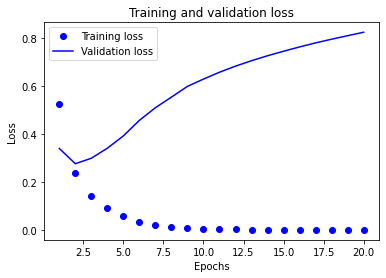

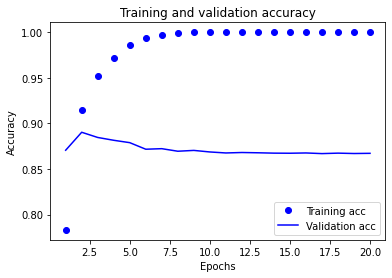

In [79]:
historyp2 = history2.history
loss_values = historyp2["loss"]
val_loss_values = historyp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp2["accuracy"]
val_acc = historyp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


*3.Try using the mse loss function instead of binary_crossentropy.*


In [80]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [81]:
model3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

In [82]:
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.1827 - accuracy: 0.7688 - val_loss: 0.1213 - val_accuracy: 0.8618
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0871 - accuracy: 0.9061 - val_loss: 0.0898 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0569 - accuracy: 0.9381 - val_loss: 0.0836 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0418 - accuracy: 0.9577 - val_loss: 0.0834 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0314 - accuracy: 0.9720 - val_loss: 0.0855 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0239 - accuracy: 0.9811 - val_loss: 0.0872 - val_accuracy: 0.8800
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0179 - accuracy: 0.9872 - val_loss: 0.0899 - val_accuracy: 0.8772
Epoch 8/20
30

**Ploting:**

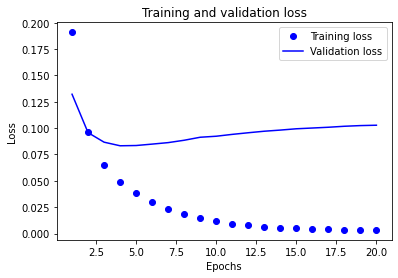

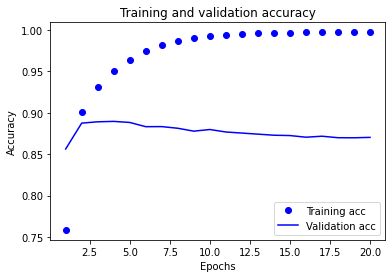

In [49]:
historyp3 = history3.history
loss_values = historyp3["loss"]
val_loss_values = historyp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



plt.clf()
acc = historyp3["accuracy"]
val_acc = historyp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

*4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.*


In [50]:
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [51]:
model4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

In [52]:
history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1664 - accuracy: 0.7909 - val_loss: 0.1109 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0777 - accuracy: 0.9113 - val_loss: 0.0867 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0508 - accuracy: 0.9438 - val_loss: 0.0835 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0359 - accuracy: 0.9647 - val_loss: 0.0845 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0262 - accuracy: 0.9780 - val_loss: 0.0873 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0194 - accuracy: 0.9851 - val_loss: 0.0908 - val_accuracy: 0.8806
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0151 - accuracy: 0.9885 - val_loss: 0.0931 - val_accuracy: 0.8764
Epoch 8/20
30

**Ploting:**

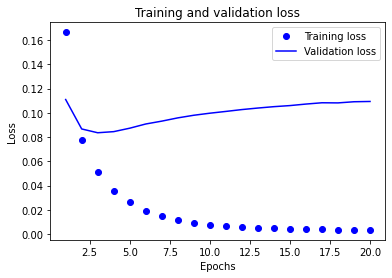

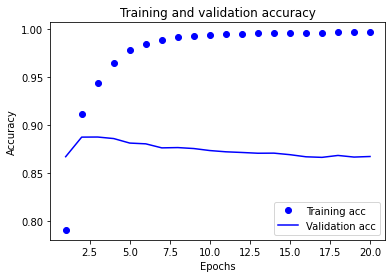

In [53]:
historyp4 = history4.history
loss_values = historyp4["loss"]
val_loss_values = historyp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = historyp4["accuracy"]
val_acc = historyp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

*5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.*

In [83]:
model5 = keras.Sequential([
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [84]:
model5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [85]:
history5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5922 - accuracy: 0.7208 - val_loss: 0.4353 - val_accuracy: 0.8478
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3601 - accuracy: 0.8720 - val_loss: 0.3096 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2473 - accuracy: 0.9164 - val_loss: 0.2783 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1871 - accuracy: 0.9357 - val_loss: 0.2748 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1454 - accuracy: 0.9531 - val_loss: 0.2825 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1139 - accuracy: 0.9666 - val_loss: 0.2966 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0890 - accuracy: 0.9751 - val_loss: 0.3175 - val_accuracy: 0.8840
Epoch 8/20
30

**Ploting:**

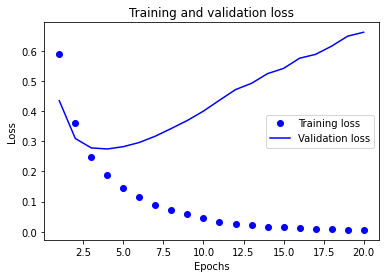

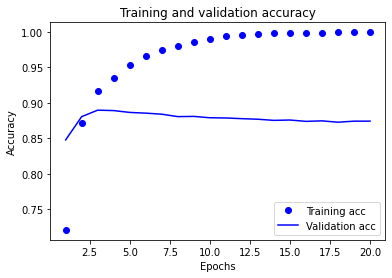

In [86]:
historyp5 = history5.history
loss_values = historyp5["loss"]
val_loss_values = historyp5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = historyp5["accuracy"]
val_acc = historyp5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
